pip install tensorflow

Import all the required libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

Load the dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Show the dataset

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

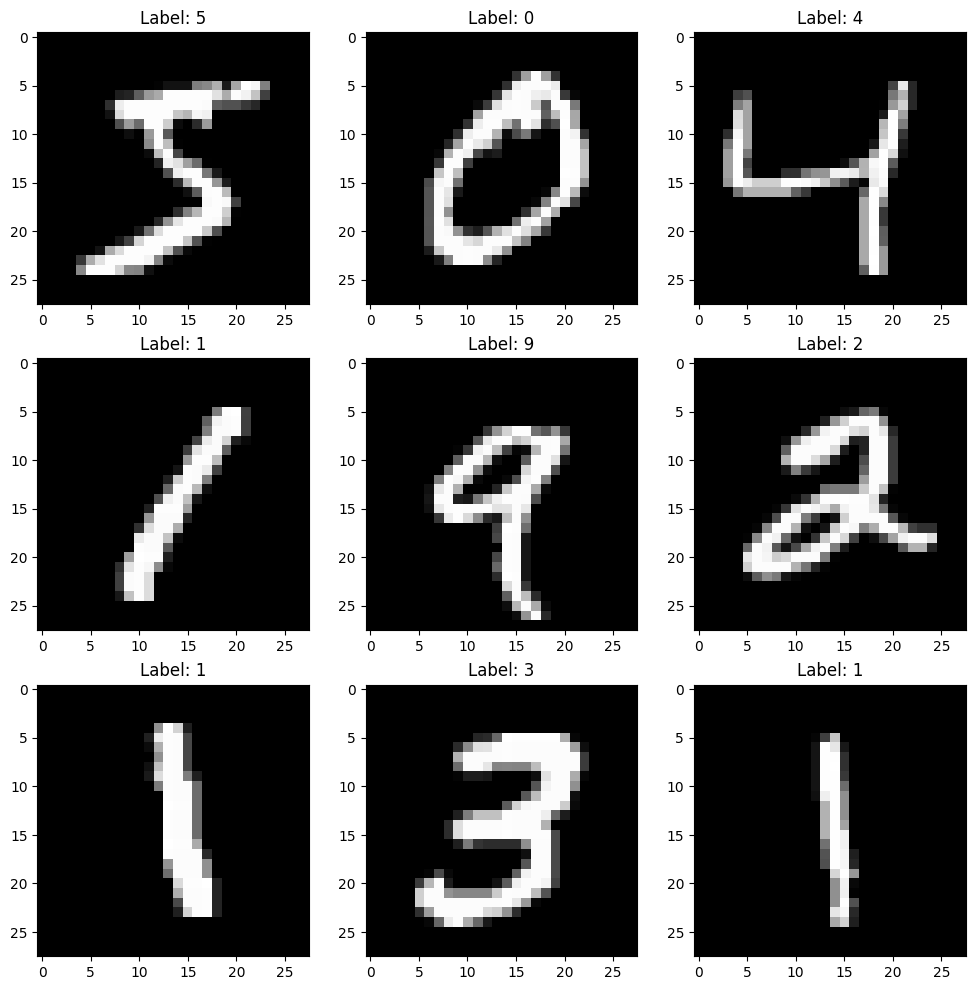

In [ ]:
import matplotlib.pyplot as plt

# function definition
def show_images(images, labels, num):
  plt.figure(figsize=(12, 12))
  for i in range(num):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
  plt.show()


# function calling
show_images(X_train, y_train, 9)

Data Preprocessing

In [ ]:
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

Define the model

In [ ]:
model = models.Sequential([
    # hidden layer 1
    layers.Dense(64, activation='relu', input_shape=(784,)),
    # hidden layer 2
    layers.Dense(32, activation='relu'),
    # output layer
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8261 - loss: 0.6035
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9528 - loss: 0.1610
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9652 - loss: 0.1152
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9735 - loss: 0.0885
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9778 - loss: 0.0725
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9818 - loss: 0.0605
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9853 - loss: 0.0491
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9863 - loss: 0.0440
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9890 - loss: 0.0361
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0333


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9700 - loss: 0.1045


Model Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


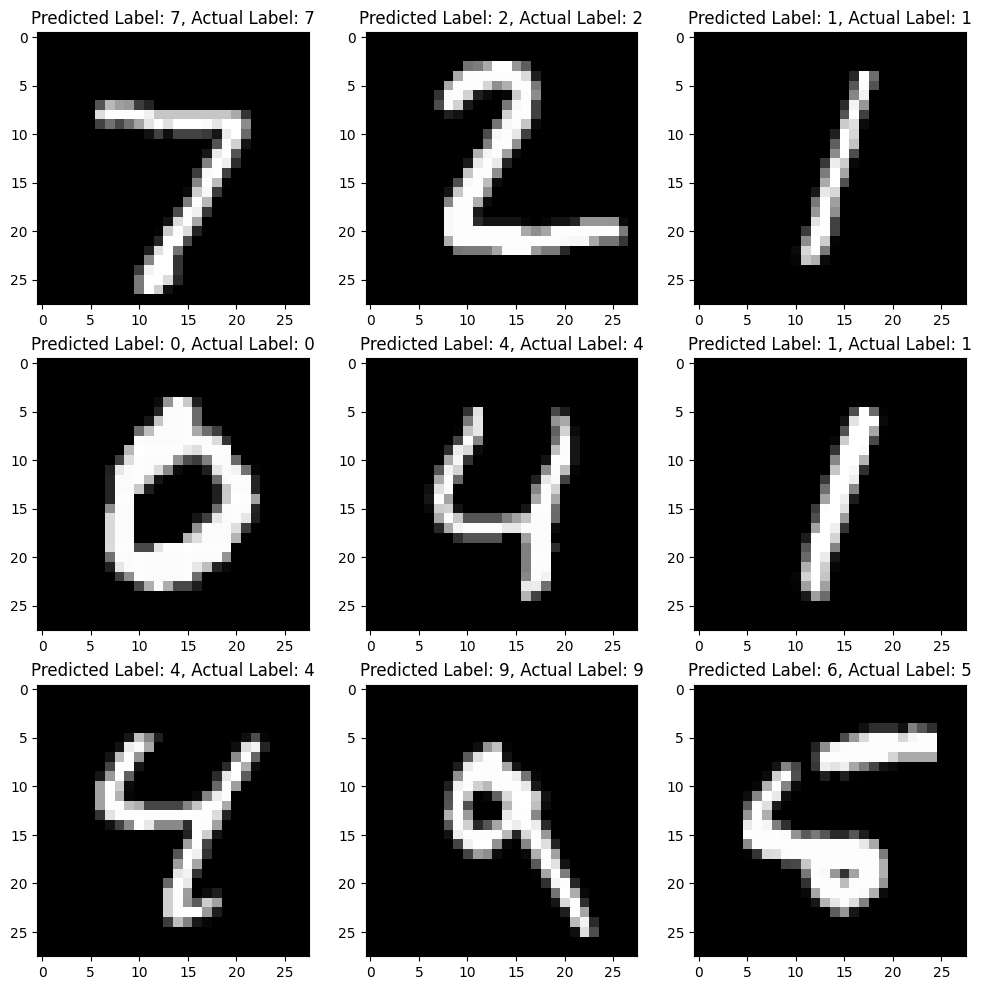

In [ ]:
import numpy as np

predictions = model.predict(X_test[:9]) # predict 9 images
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 12))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted Label: {predicted_labels[i]}, Actual Label: {y_test[i]}")
plt.show()

Task: You need to create your own sample image which contains any digit from 0 to 9 and then do the testing of that image with the today's model that we have created in the LIVE discussion and let me know whether the model performs well with your test image or not.

Save the trained model

In [ ]:
model.save('mnist_model.h5')

For future testing, you can directly load the above .h5 file

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


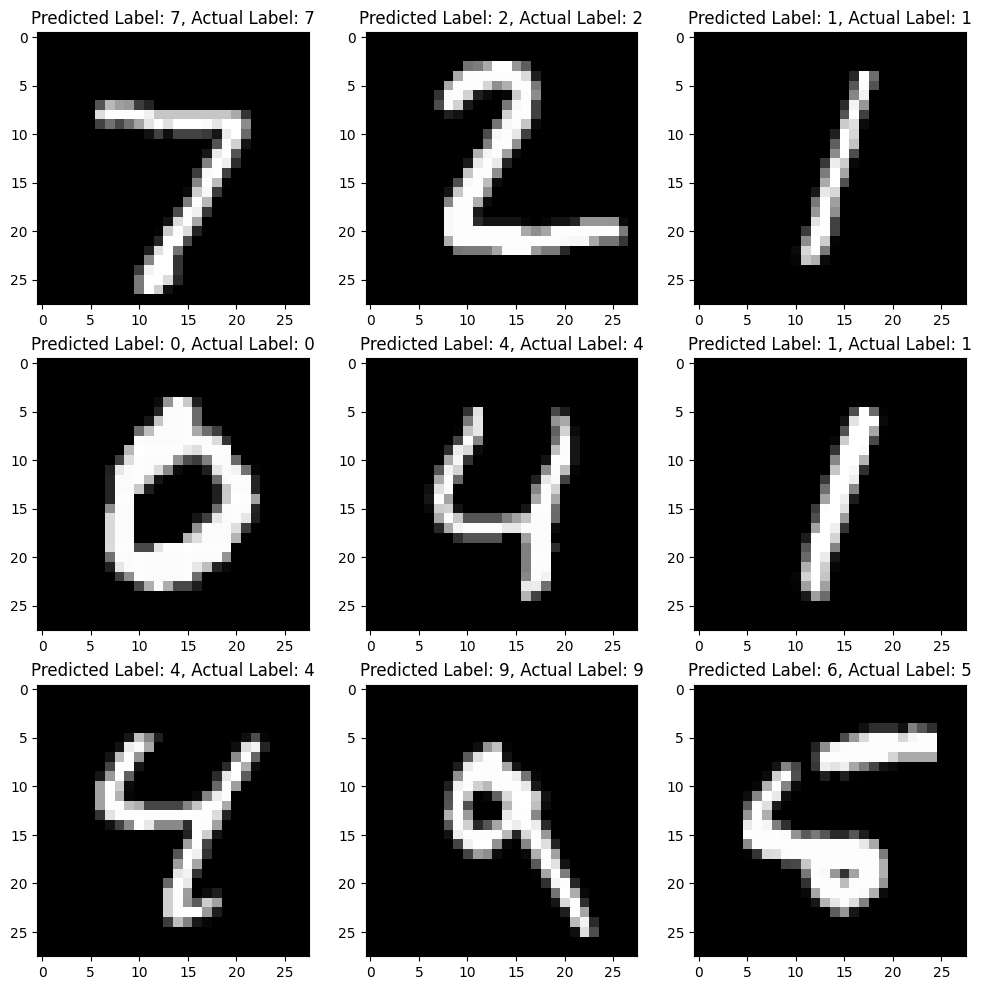

In [ ]:
from tensorflow import keras

loaded_model = keras.models.load_model('/content/mnist_model.h5')


predictions = loaded_model.predict(X_test[:9]) # predict 9 images
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 12))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted Label: {predicted_labels[i]}, Actual Label: {y_test[i]}")
plt.show()